In [ ]:
## This block imports the Python libraries we need for the project
import yfinance as yf
import numpy as np

In [ ]:
## Define the stock tickers we want to analyze.
tickers = ["SPY", "AAPL"]

In [42]:
data = yf.download(tickers, start="2023-01-01", auto_adjust=False)

[*********************100%***********************]  2 of 2 completed


In [ ]:
## yfinance sometimes downloads data with a "MultiIndex" column structure,
## where columns have two levels (e.g., ('Close', 'SPY')). This code checks for that
## and flattens the columns into a single, more readable format like 'SPY_Close'.

if isinstance(data.columns, pd.MultiIndex):
    data.columns = [f'{level1}_{level0}' for level0, level1 in data.columns]

### Now, we should have columns named like 'AAPL_Adj Close', 'SPY_Adj Close', etc.
print("Final DataFrame columns:")
print(data.columns)

### Now, we can access the columns using these new names.
spy_returns = data['SPY_Adj Close'].pct_change().dropna()
aapl_returns = data['AAPL_Adj Close'].pct_change().dropna()

Final DataFrame columns:
Index(['AAPL_Adj Close', 'SPY_Adj Close', 'AAPL_Close', 'SPY_Close',
       'AAPL_High', 'SPY_High', 'AAPL_Low', 'SPY_Low', 'AAPL_Open', 'SPY_Open',
       'AAPL_Volume', 'SPY_Volume'],
      dtype='object')


In [44]:
print("\nSPY Returns:")
print(spy_returns.head())

print("\nAAPL Returns:")
print(aapl_returns.head())


SPY Returns:
Date
2023-01-04    0.007720
2023-01-05   -0.011413
2023-01-06    0.022932
2023-01-09   -0.000567
2023-01-10    0.007013
Name: SPY_Adj Close, dtype: float64

AAPL Returns:
Date
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
2023-01-10    0.004456
Name: AAPL_Adj Close, dtype: float64


In [ ]:
## The Sharpe Ratio measures the risk-adjusted return of an investment.
## A higher ratio indicates a better return for the amount of risk taken.
## returns: A Series of daily returns for a stock or portfolio.
## adjustment_factor: The risk-free rate, which is typically subtracted from returns.
## It's set to 0.0 here for simplicity, assuming a risk-free rate of zero.
## For a more advanced analysis, one could use a benchmark like T-bill returns.

def sharpe_ratio(returns, adjustment_factor=0.0):
    ## Subtract the risk-free rate from the returns.
    returns_risk_adj = returns - adjustment_factor
    ## Calculate the ratio: average excess return divided by the standard deviation of excess return.
    ## We annualize it by multiplying by the square root of 252 (the number of trading days in a year).
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

In [46]:
### sharpe ratio for SPY
sharpe_ratio(spy_returns)

### sharpe ratio for AAPL
sharpe_ratio(aapl_returns)

np.float64(1.0211275768720907)

<Axes: xlabel='Date'>

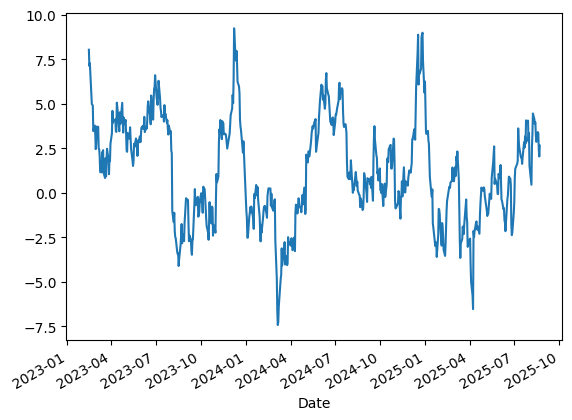

In [ ]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot()
## This helps to see how the risk-adjusted performance of the stock changes over time.

In [ ]:
## Here's how to interpret the plot:

## Values Above Zero: A value above zero indicates that the stock's returns were, 
## on average, higher than the assumed risk-free rate for that 30-day period, adjusted for its volatility. 
## We can see that most of the line is in positive territory, which is a good sign.

## Values Below Zero: When the line dips below zero, it means that for that 30-day period, the stock's returns were not enough to compensate for the risk, 
## or the returns were negative. This happened briefly in late 2023 and early 2024.

## Trends in Performance: The chart shows periods where the risk-adjusted return was very high (e.g., early 2024) and periods where it was poor. 
## This highlights the non-static nature of performance and the importance of analyzing it over time. 
## A single Sharpe Ratio for the entire period would hide these ups and downs.

## The overall trend shows that AAPL's risk-adjusted performance has been volatile itself, but generally positive.

<Axes: xlabel='Date'>

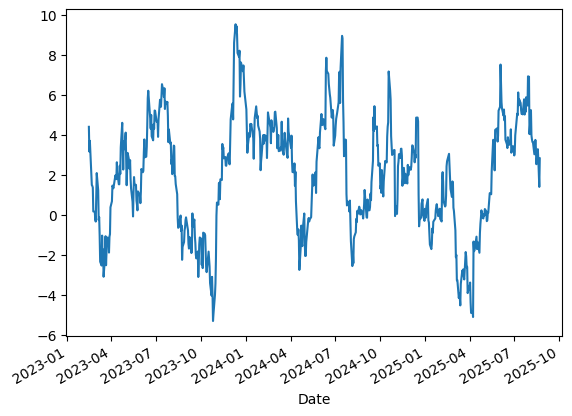

In [ ]:
spy_returns.rolling(30).apply(sharpe_ratio).plot()
## Same for SPY.

In [ ]:
## How to interpret this plot and compare it to the AAPL chart:

## Similar Volatility: We can see that the SPY rolling Sharpe Ratio also fluctuates significantly over time, 
## with similar up and down movements to AAPL's. This is expected, as both are influenced by general market conditions.

## Range of Values: The values for SPY seem to have a slightly smaller range than those for AAPL. 
## AAPL had some periods with Sharpe Ratios approaching 10.0, while SPY's peaks appear to be slightly lower. 
## This could suggest that while AAPL has had periods of exceptionally high performance, it also had more extreme downside movements, which is a common characteristic of individual stocks versus diversified ETFs.

## Comparison to AAPL: By looking at both charts, you can visually see that the "spikes" and "dips" are often synchronized, 
## confirming the strong correlation between a major stock like Apple and the overall market. 
## However, a direct comparison is difficult just by looking at the two charts. 

## This chart confirms that even a broad market index like SPY has varying risk-adjusted performance over time.

<Axes: >

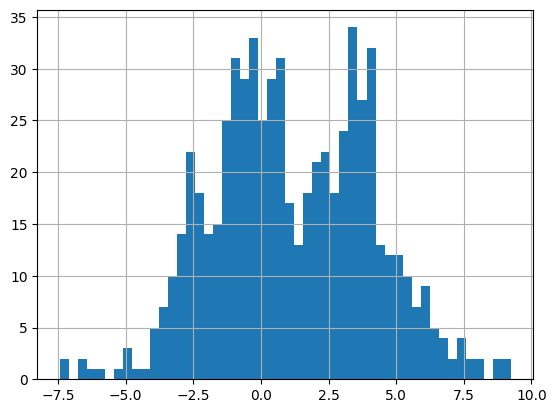

In [ ]:
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50)
## A histogram shows the distribution of the values. This helps us see
## how often the ratio was high or low over the period.

In [ ]:
## Distribution of 30-Day Rolling Sharpe Ratio for AAPL
## This histogram shows the frequency of different Sharpe Ratio values for Apple (AAPL). 
## Instead of showing the values over time, it groups them into bins and counts how many times the Sharpe Ratio fell into each range.

## Central Tendency: The histogram shows that the most frequent Sharpe Ratio values for AAPL are clustered around 1.5 to 4.0 and -2.5 to 0.0. 
## This indicates that AAPL's risk-adjusted performance was not consistently at a single level; rather, it had two major "modes" of performance, one positive and one negative.

## Skewness: The distribution is not perfectly symmetrical. There's a longer "tail" of values on the right side, 
## meaning there were more periods with exceptionally high positive Sharpe Ratios than there were periods with exceptionally low negative ones.

## Bimodal Distribution: The two distinct peaks (one around zero and one around 3) suggest a bimodal distribution. 
## This could be due to a significant change in the stock's performance or market conditions over the period, 
## leading to two different "regimes" of risk-adjusted returns.

## This histogram gives you a quick visual summary of AAPL's performance history, 
## highlighting its typical performance levels and the frequency of both good and bad periods.

<Axes: >

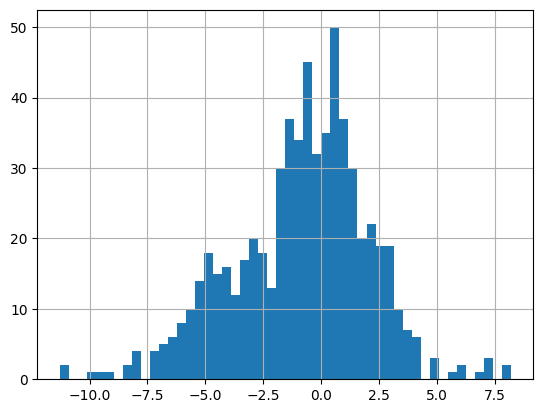

In [ ]:
(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50)

## Plot a histogram of the difference between the rolling Sharpe Ratios:
## This is a great way to see which stock had a better risk-adjusted return more often.
## If the histogram is centered on a positive number, it means AAPL's ratio was
## higher than SPY's more frequently.

In [ ]:
## Distribution of the Difference in Rolling Sharpe Ratios (AAPL - SPY)
## This final histogram is arguably the most insightful for comparing the two assets. 
## It plots the difference between the 30-day rolling Sharpe Ratios of AAPL and SPY.

## Values Greater Than 0: When the difference is positive, it means that for that 30-day period, AAPL had a higher risk-adjusted return than SPY. 
## The farther to the right the value is, the better AAPL performed compared to SPY.

## Values Less Than 0: When the difference is negative, it means SPY had a higher risk-adjusted return than AAPL for that period.

## The Center Point: The key to this chart is where the distribution is centered. 
## The histogram's peak is very close to zero, slightly to the right of it. 
## This suggests that over the entire period, the risk-adjusted returns of AAPL and SPY were roughly equal.

## Distribution of Outperformance: The chart shows that while both assets had periods of outperformance, 
## AAPL had a larger range of extreme results, with some periods where it significantly outperformed SPY (values up to 7.5 on the right)
## and some periods where it significantly underperformed (values down to -10.0 on the left).

## In summary, this graph tells you that while AAPL and SPY had very similar risk-adjusted returns on average, 
## AAPL was a more volatile investment, offering both the potential for higher Sharpe Ratios and the risk of significantly worse ones compared to the overall market.